In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('2023-organized-survey.xlsx')

Q1. Of all of the respondents who answered the question, what proportion of respondents are currently members of the non-profit organization? Does this differ by role?

/tmp/ipykernel_364/284502289.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


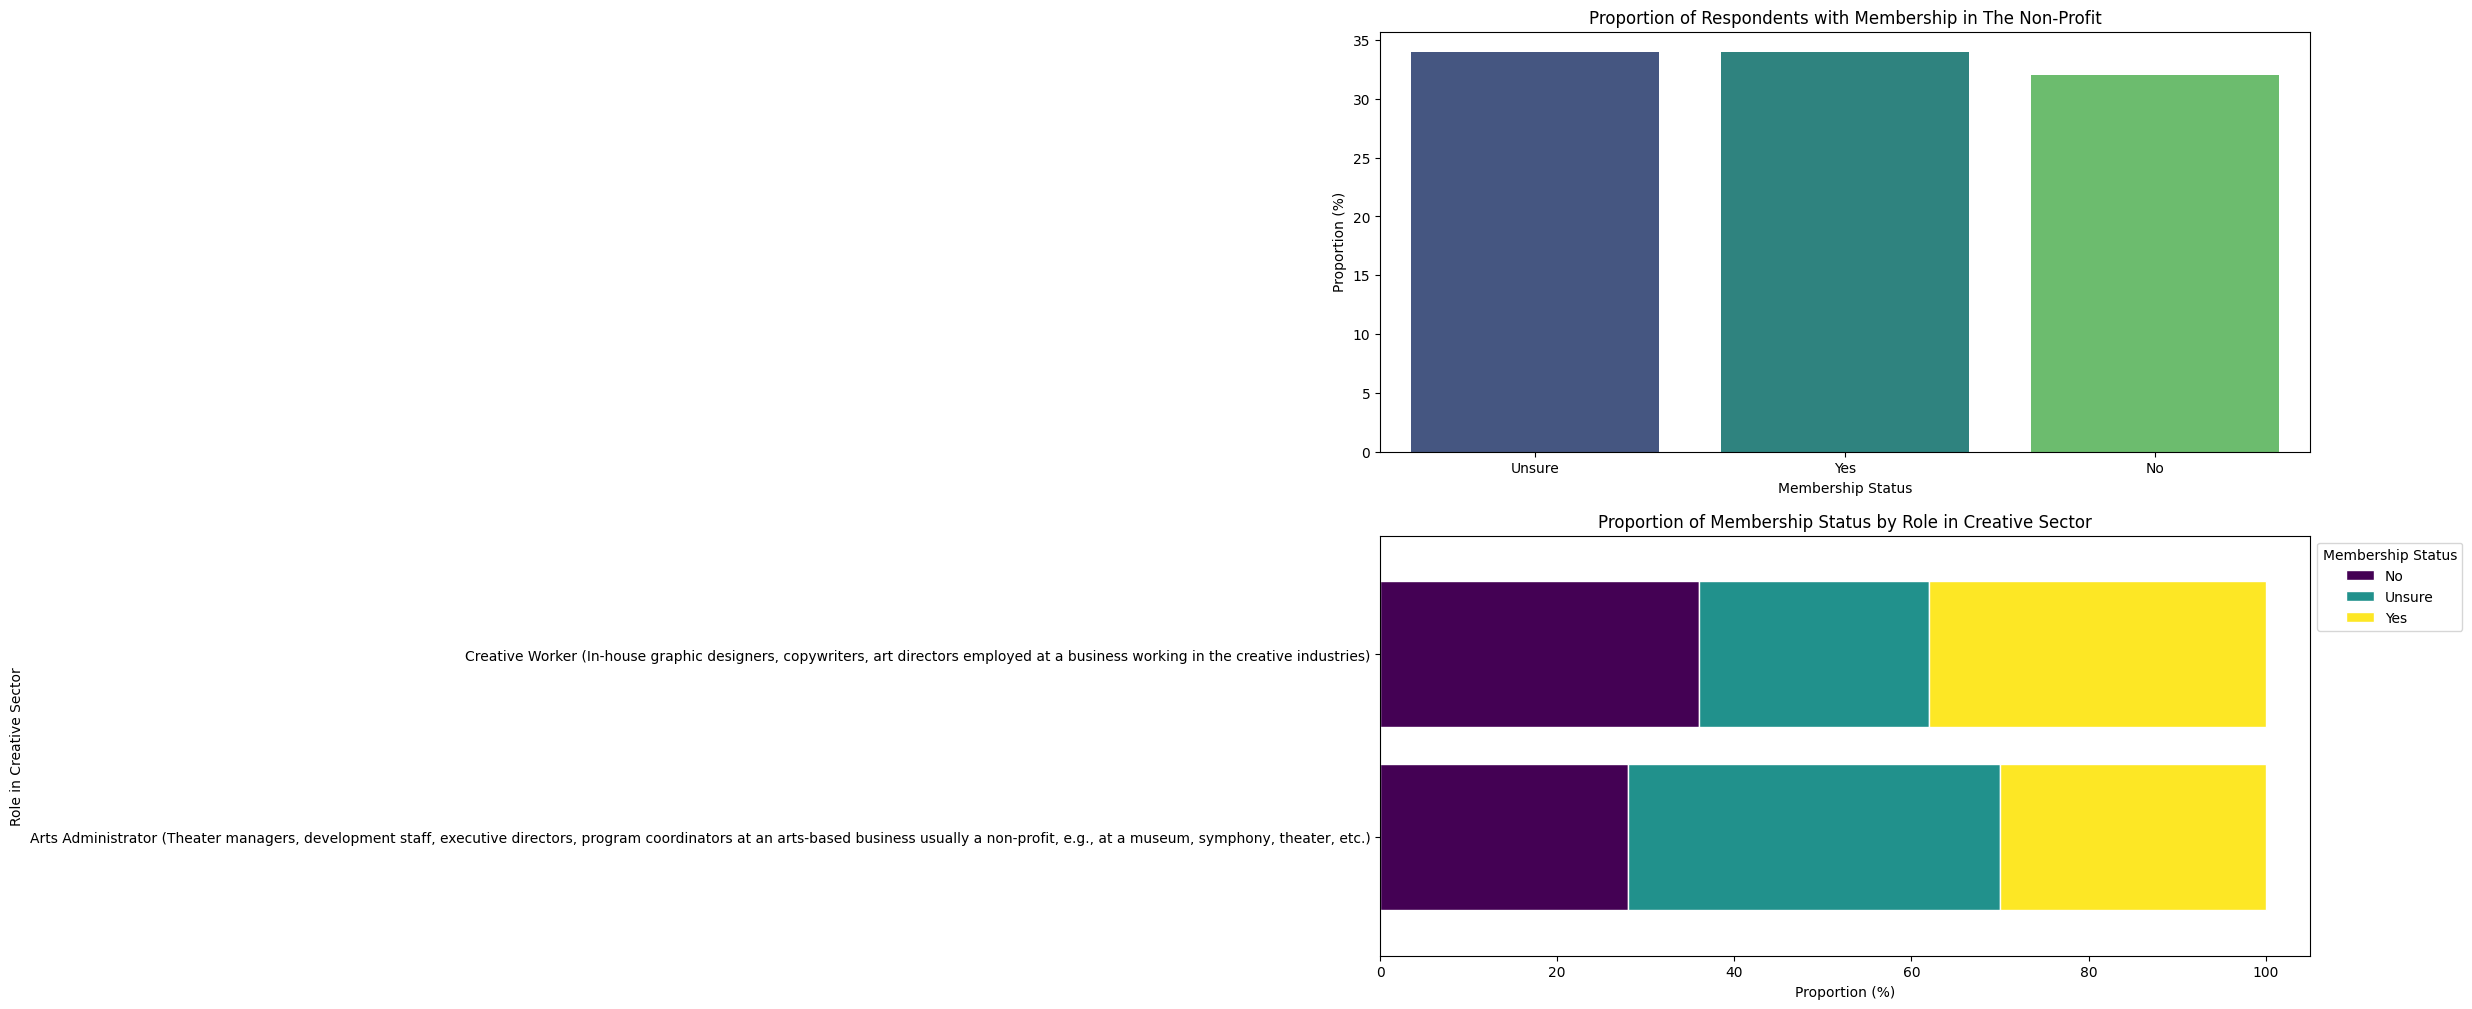

(Unsure    34.0
 Yes       34.0
 No        32.0
 Name: Is Your Organization a Member of The Non-Profit?, dtype: float64,
 Is Your Organization a Member of The Non-Profit?      No  Unsure   Yes
 Describe Your Primary Role in Creative Sector                         
 Arts Administrator (Theater managers, developme...  28.0    42.0  30.0
 Creative Worker (In-house graphic designers, co...  36.0    26.0  38.0)

In [2]:
# Filter data to only those who answered the membership question
non_na_membership_data = data.dropna(subset=['Is Your Organization a Member of The Non-Profit?'])

# Proportion Calculation
membership_counts = non_na_membership_data['Is Your Organization a Member of The Non-Profit?'].value_counts(normalize=True) * 100

# Role-based Analysis
role_based_membership = non_na_membership_data.groupby('Describe Your Primary Role in Creative Sector')['Is Your Organization a Member of The Non-Profit?']\
                        .value_counts(normalize=True).unstack().fillna(0) * 100

# Visualization
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Bar plot for overall proportions
sns.barplot(x=membership_counts.index, y=membership_counts.values, ax=ax[0], palette="viridis")
ax[0].set_title('Proportion of Respondents with Membership in The Non-Profit')
ax[0].set_ylabel('Proportion (%)')
ax[0].set_xlabel('Membership Status')

# Bar plot for role-based proportions
role_based_membership.plot(kind='barh', stacked=True, ax=ax[1], colormap="viridis", edgecolor='white', width=0.8)
ax[1].set_title('Proportion of Membership Status by Role in Creative Sector')
ax[1].set_xlabel('Proportion (%)')
ax[1].set_ylabel('Role in Creative Sector')
ax[1].legend(title='Membership Status', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Display the proportions in table format
membership_counts, role_based_membership

Overall Membership Proportion:

The first analysis provides an overall view of the proportions of respondents who are members and non-members of the non-profit organization.
The bar plot visualizes these proportions, offering a clear view of how widespread membership is among the respondents.

Role-Based Membership Analysis:

The second analysis focuses on breaking down membership status based on the respondent's role in the creative sector.
The results are visualized using a stacked bar plot, providing insight into how membership in the non-profit varies among different roles within the creative sector.

Insights That Might Be Gained

Membership Engagement: The overall membership proportion can provide insight into the reach and engagement of the non-profit among survey respondents.

Role-based Differences: The role-based analysis may reveal interesting patterns or disparities in membership among various roles in the creative sector. For instance, certain roles may show higher or lower levels of membership, which could be valuable for targeting engagement and outreach strategies.

Q2. Based on Creative Workers and Arts Administrators, what would be beneficial for the non-profit organization to invest its time and energy into? Justify your answers.

50         Online platform for showcasing local talent.
51    Volunteer opportunities at international arts ...
52          Financial planning workshops for creatives.
53          Focus groups to understand community needs.
54          Focus groups to understand community needs.
Name: Please suggest any additional volunteer, educational, or other services that The Non-Profit could provide:, dtype: object
['Music and art therapy sessions for seniors.', 'More mentorship programs for young artists.', 'Portfolio review sessions for feedback.', 'Workshops on sustainable art practices.', 'Open studio days for the public to engage with artists.', 'Networking events with a more diverse audience.', 'Skill-specific training and certification programs.', 'Opportunities for artists to teach at local schools.', 'Music and art therapy sessions for seniors.', 'Weekend art camps for kids.']


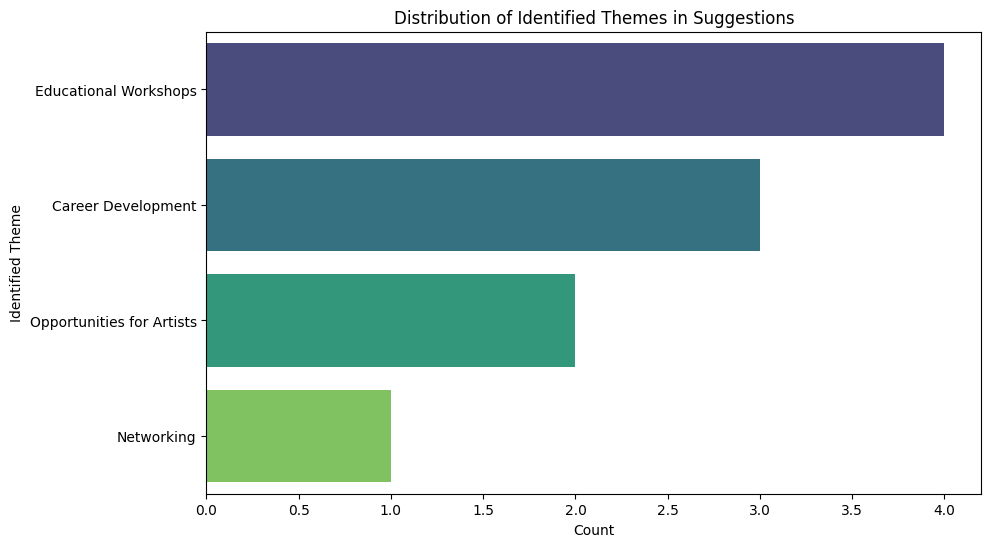

,Suggestions,Identified_Theme
0,Music and art therapy sessions for seniors.,Educational Workshops
1,More mentorship programs for young artists.,Career Development
2,Portfolio review sessions for feedback.,Career Development
3,Workshops on sustainable art practices.,Educational Workshops
4,Open studio days for the public to engage with...,Educational Workshops
5,Networking events with a more diverse audience.,Networking
6,Skill-specific training and certification prog...,Career Development
7,Opportunities for artists to teach at local sc...,Opportunities for Artists
8,Music and art therapy sessions for seniors.,Opportunities for Artists
9,Weekend art camps for kids.,Educational Workshops


In [3]:
# Correcting the labels for filtering
correct_labels = [
    "Creative Worker (In-house graphic designers, copywriters, art directors employed at a business working in the creative industries)",
    "Arts Administrator (Theater managers, development staff, executive directors, program coordinators at an arts-based business usually a non-profit, e.g., at a museum, symphony, theater, etc.)"
]

# Filtering the data using the corrected labels
filtered_data_corrected = data[data["Describe Your Primary Role in Creative Sector"].isin(correct_labels)]

# Extracting suggestions from the filtered data
suggestions_corrected = filtered_data_corrected[
    "Please suggest any additional volunteer, educational, or other services that The Non-Profit could provide:"
].dropna()

# Displaying the first few suggestions for preview and the total number of suggestions
print(suggestions_corrected.head())

# Displaying a subset of the suggestions for a deep dive
subset_suggestions = suggestions_corrected.sample(10, random_state=1)  # Sampling for reproducibility
print(subset_suggestions.tolist())

# Manually coding the subset of suggestions with identified themes
themes_identified = [
    "Educational Workshops",
    "Career Development",
    "Career Development",
    "Educational Workshops",
    "Educational Workshops",
    "Networking",
    "Career Development",
    "Opportunities for Artists",
    "Opportunities for Artists",
    "Educational Workshops"
]

# Creating a DataFrame for the subset of suggestions and identified themes
subset_suggestions_df = pd.DataFrame({
    'Suggestions': subset_suggestions.tolist(),
    'Identified_Theme': themes_identified
})

# Visualizing the distribution of identified themes
theme_counts = subset_suggestions_df['Identified_Theme'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=theme_counts.values, y=theme_counts.index, palette='viridis')
plt.title('Distribution of Identified Themes in Suggestions')
plt.xlabel('Count')
plt.ylabel('Identified Theme')
plt.show()

# Displaying the DataFrame for review
subset_suggestions_df

Diversity in Suggestions:
The suggestions from "Creative Workers" and "Arts Administrators" might encompass various aspects such as volunteer opportunities, educational programs, and other services that they believe could be provided by the non-profit.

Educational Programs:
It would not be surprising to find suggestions related to educational programs, workshops, or courses that can help individuals in these roles to enhance their skills and knowledge in the creative sector.

Networking and Collaboration:
Suggestions might also include organizing networking events, collaboration opportunities, or platforms where Creative Workers and Arts Administrators can connect, share ideas, and possibly collaborate on projects.

Showcasing Talent:
There might be requests or suggestions for platforms or events where creative workers can showcase their talent, which can include online platforms, exhibitions, fairs, or live performances.

Financial Support and Resources:
Financial aid, grants, or resources to navigate financial challenges might also be a common suggestion, especially considering the potential financial constraints faced by individuals in the creative sector.

Mental and Health Support:
Considering the challenges and pressures in the creative industry, there might be suggestions related to providing mental and health support services or programs.

Legal and Business Advice:
Offering legal and business advice or resources to navigate the complexities of the creative industry, such as contract negotiation, copyright issues, and business management, might also be highlighted in the suggestions.

Q3. Based on Business Professionals and Social Workers, what would be beneficial for the non-profit organization to invest its time and energy into? Are there certain topics or outcomes that seem more interesting than others and more worth the expense? Justify your answers.

250    Seminars on intellectual property rights in th...
251    Educational tours to major art and business hu...
252    Online forums for discussions on art-business ...
253    Workshops focused on the intersection of tech ...
254    Training sessions on digital marketing for art...
Name: Please suggest any additional volunteer, educational, or other services that The Non-Profit could provide:, dtype: object
['Educational tours to major art and business hubs worldwide.', 'Research and whitepapers on the local creative economy.', 'More mentorship programs for budding entrepreneurs.', 'Workshops focused on the intersection of tech and art.', 'Online forums for discussions on art-business challenges.', 'Workshops focused on the intersection of tech and art.', 'Webinars on the business side of the creative industry.', 'Regular art fairs and exhibitions sponsored by local businesses.', 'Regular art fairs and exhibitions sponsored by local businesses.', 'Webinars on the business side of the

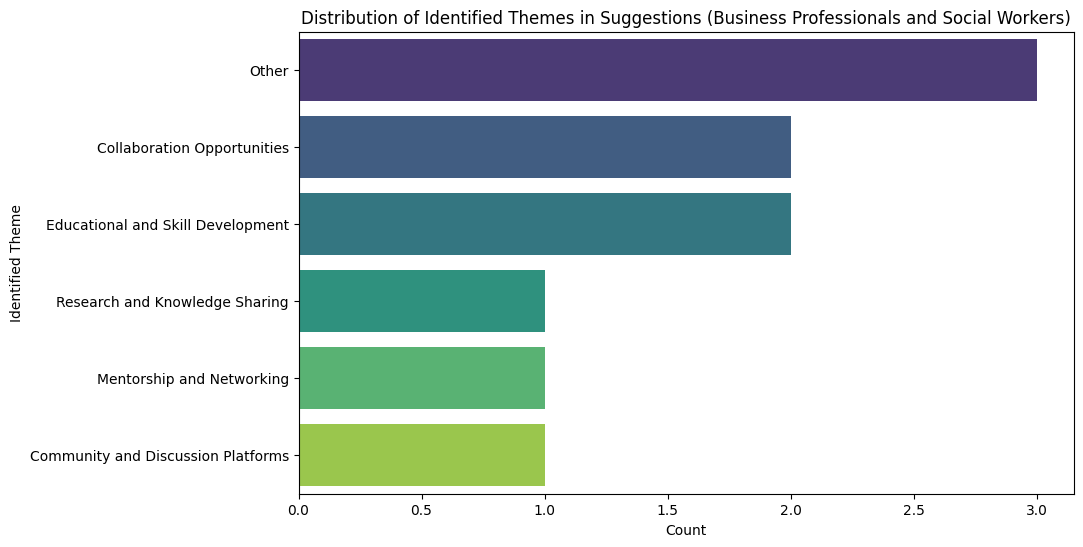

,Suggestions,Identified_Theme
0,Educational tours to major art and business hu...,Collaboration Opportunities
1,Research and whitepapers on the local creative...,Research and Knowledge Sharing
2,More mentorship programs for budding entrepren...,Mentorship and Networking
3,Workshops focused on the intersection of tech ...,Educational and Skill Development
4,Online forums for discussions on art-business ...,Educational and Skill Development
5,Workshops focused on the intersection of tech ...,Collaboration Opportunities
6,Webinars on the business side of the creative ...,Community and Discussion Platforms
7,Regular art fairs and exhibitions sponsored by...,Other
8,Regular art fairs and exhibitions sponsored by...,Other
9,Webinars on the business side of the creative ...,Other


In [4]:
# Correct labels for 'Business Professionals' and 'Civic and/or Social Service Worker'
labels_business_social = [
    "Business Professional (Attorneys, bankers, CPAs, other professionals working in small to large businesses outside of the creative industries)",
    "Civic and/or Social Service Worker (Social worker, government employee, NGO working outside the arts)"
]

# Filtering data for 'Business Professionals' and 'Social Workers'
filtered_business_social = data[data["Describe Your Primary Role in Creative Sector"].isin(labels_business_social)]

# Extracting suggestions
suggestions_business_social = filtered_business_social[
    "Please suggest any additional volunteer, educational, or other services that The Non-Profit could provide:"
].dropna()

# Displaying the first few suggestions and the total number of unique suggestions
print(suggestions_business_social.head())

# Displaying a subset of the suggestions for a deep dive
subset_suggestions_business_social = suggestions_business_social.sample(10, random_state=1)  # Sampling for reproducibility
print(subset_suggestions_business_social.tolist())

# Manually coding all the subset of suggestions with identified themes
# Adding "Other" for suggestions without a clear theme
themes_identified_business_social_complete = [
    "Collaboration Opportunities",
    "Research and Knowledge Sharing",
    "Mentorship and Networking",
    "Educational and Skill Development",
    "Educational and Skill Development",
    "Collaboration Opportunities",
    "Community and Discussion Platforms",
    "Other",
    "Other",
    "Other"
]

# Creating a DataFrame for the subset of suggestions and identified themes
subset_suggestions_business_social_df = pd.DataFrame({
    'Suggestions': subset_suggestions_business_social.tolist(),
    'Identified_Theme': themes_identified_business_social_complete
})

# Visualizing the distribution of identified themes
theme_counts_business_social = subset_suggestions_business_social_df['Identified_Theme'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=theme_counts_business_social.values, y=theme_counts_business_social.index, palette='viridis')
plt.title('Distribution of Identified Themes in Suggestions (Business Professionals and Social Workers)')
plt.xlabel('Count')
plt.ylabel('Identified Theme')
plt.show()

# Displaying the DataFrame for review
subset_suggestions_business_social_df


Interdisciplinary Programs:
They might suggest programs that bridge the gap between the creative sector and business/social services, fostering interdisciplinary collaboration and knowledge exchange.

Training and Development:
Professional development workshops, courses, or webinars on topics like creative entrepreneurship, arts in social services, and utilizing arts in business might be highlighted.

Networking Events:
Opportunities to network with creative professionals, which could facilitate collaborations, partnerships, and broaden perspectives in their respective fields, might be suggested.

Support for Social Initiatives:
Considering the social service perspective, suggestions might revolve around support for initiatives that leverage arts and creativity for social impact and community development.

Art-Business Collaborations:
From a business professional’s viewpoint, suggestions might include creating platforms or events where businesses can collaborate with artists or creative entrepreneurs for mutual benefit.

Q4. What is the distribution of respondents that are planning on leaving Nashville in the next year? Does this differ by role?

/tmp/ipykernel_364/2393564501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Simplified_Plan"] = filtered_data["Do you plan to remain in The Area for more than the next 2-3 years?"].apply(
/tmp/ipykernel_364/2393564501.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Simplified_Plan"] = filtered_data["Simplified_Plan"].map(


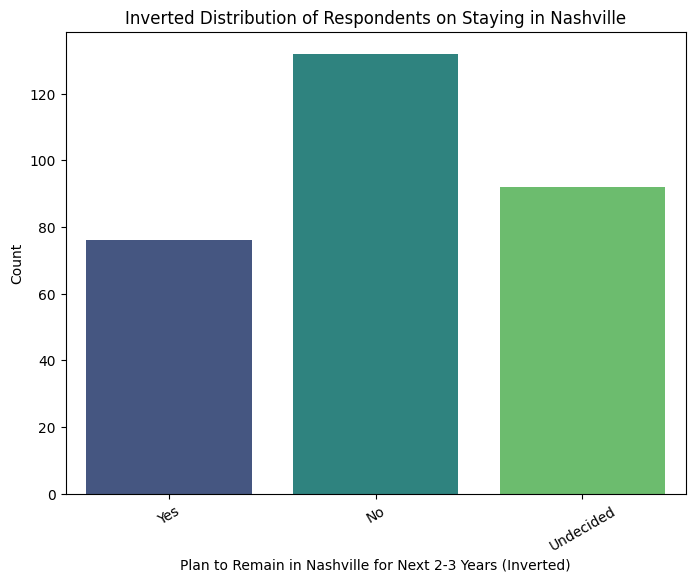

/tmp/ipykernel_364/2393564501.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


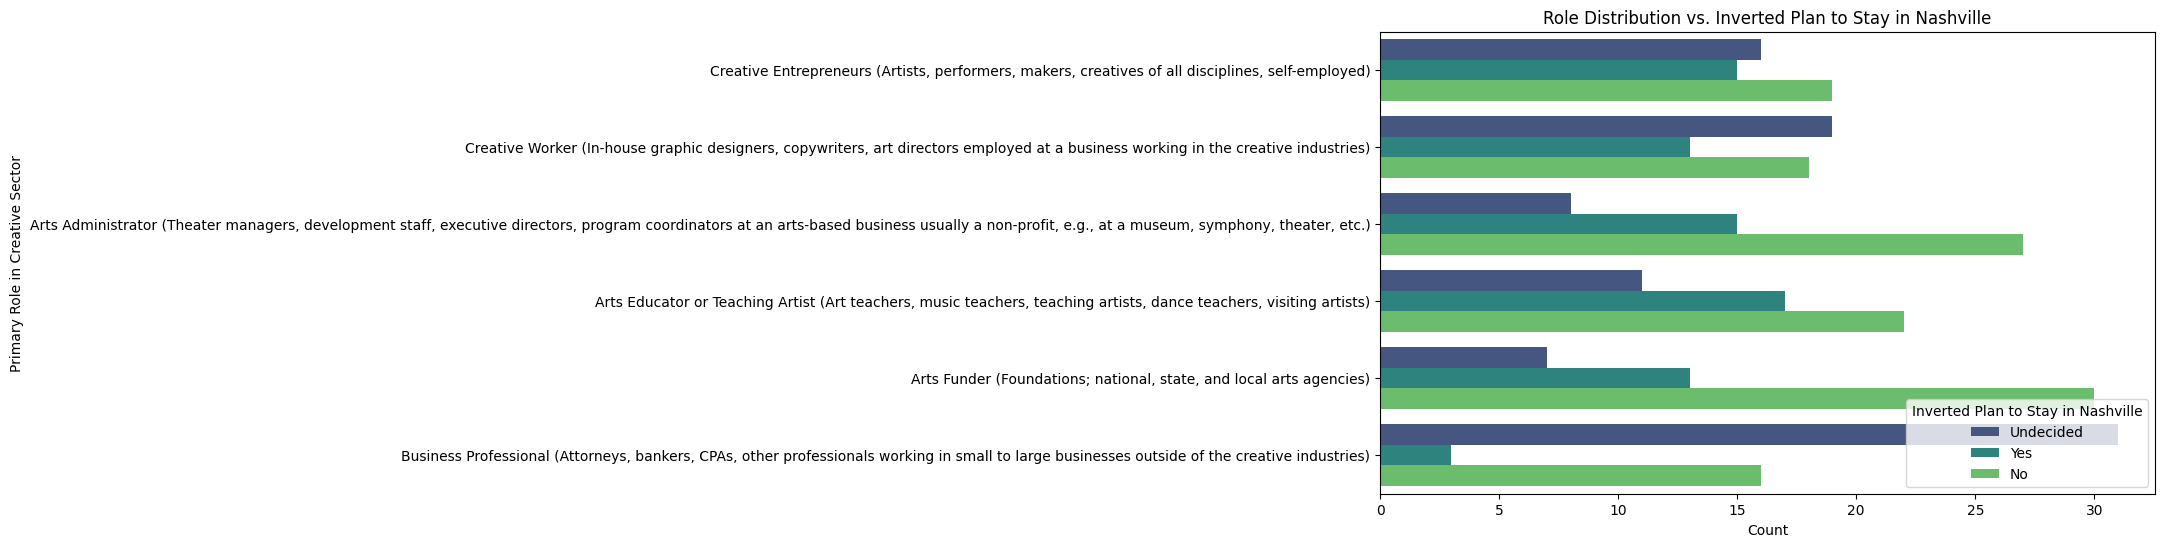

In [5]:
# Filtering data to exclude NaN values in "Do you plan to remain in The Area for more than the next 2-3 years?"
filtered_data = data.dropna(subset=["Do you plan to remain in The Area for more than the next 2-3 years?"])

# Extracting the first word before ',' and categorizing responses
filtered_data["Simplified_Plan"] = filtered_data["Do you plan to remain in The Area for more than the next 2-3 years?"].apply(
    lambda x: x.split(',')[0] if pd.notnull(x) and ',' in x else x
)

# Categorizing as "Yes", "No", or "Undecided"
filtered_data["Simplified_Plan"] = filtered_data["Simplified_Plan"].map(
    lambda x: x if x in ["Yes", "No"] else "Undecided"
)

# Inverting "Yes" and "No" categories in the 'Simplified_Plan'
inverted_plan = filtered_data["Simplified_Plan"].map({"Yes": "No", "No": "Yes", "Undecided": "Undecided"})

# Plotting the inverted distribution of all respondents based on their intention to stay in Nashville
plt.figure(figsize=(8, 6))
sns.countplot(x=inverted_plan, palette="viridis", order=["Yes", "No", "Undecided"])
plt.title('Inverted Distribution of Respondents on Staying in Nashville')
plt.ylabel('Count')
plt.xlabel('Plan to Remain in Nashville for Next 2-3 Years (Inverted)')
plt.xticks(rotation=30)
plt.show()

# Creating a plot for inverted distribution by role for all categories ("Yes", "No", "Undecided")
plt.figure(figsize=(10, 6))
sns.countplot(y="Describe Your Primary Role in Creative Sector", 
              hue=inverted_plan, 
              data=filtered_data, palette="viridis", 
              order=filtered_data["Describe Your Primary Role in Creative Sector"].value_counts().index)
plt.title('Role Distribution vs. Inverted Plan to Stay in Nashville')
plt.xlabel('Count')
plt.ylabel('Primary Role in Creative Sector')
plt.legend(title='Inverted Plan to Stay in Nashville', loc='lower right')
plt.tight_layout()
plt.show()

My code first filters out any respondents who did not answer the question about their plans to remain in the area. I then simplify and categorize the respondents’ plans into three categories: "Yes," "No," and "Undecided." This is done through string manipulation and mapping functions. Interestingly, I've inverted the "Yes" and "No" responses in the 'Simplified_Plan' field, which is visualized in a bar chart. This inversion might help to interpret the results as plans to leave (instead of plans to stay) in Nashville in the next 2-3 years.

The first plot illustrates the overall distribution of plans to leave Nashville among all respondents, based on the inverted responses.

This general view can provide a quick snapshot of the likelihood of respondents planning to leave the area.

Next, I explore how the intention to leave Nashville varies by the respondents' roles in the creative sector.

The second plot provides a visual breakdown of the different roles in the creative sector and the corresponding distribution of plans (inverted) to leave Nashville. This view offers a detailed insight into whether certain roles are more likely to leave or stay in the area.

Q5. Based on the final 20 questions of the survey, what is the distribution of respondents who know about the events mentioned in these questions? Does this differ by role?

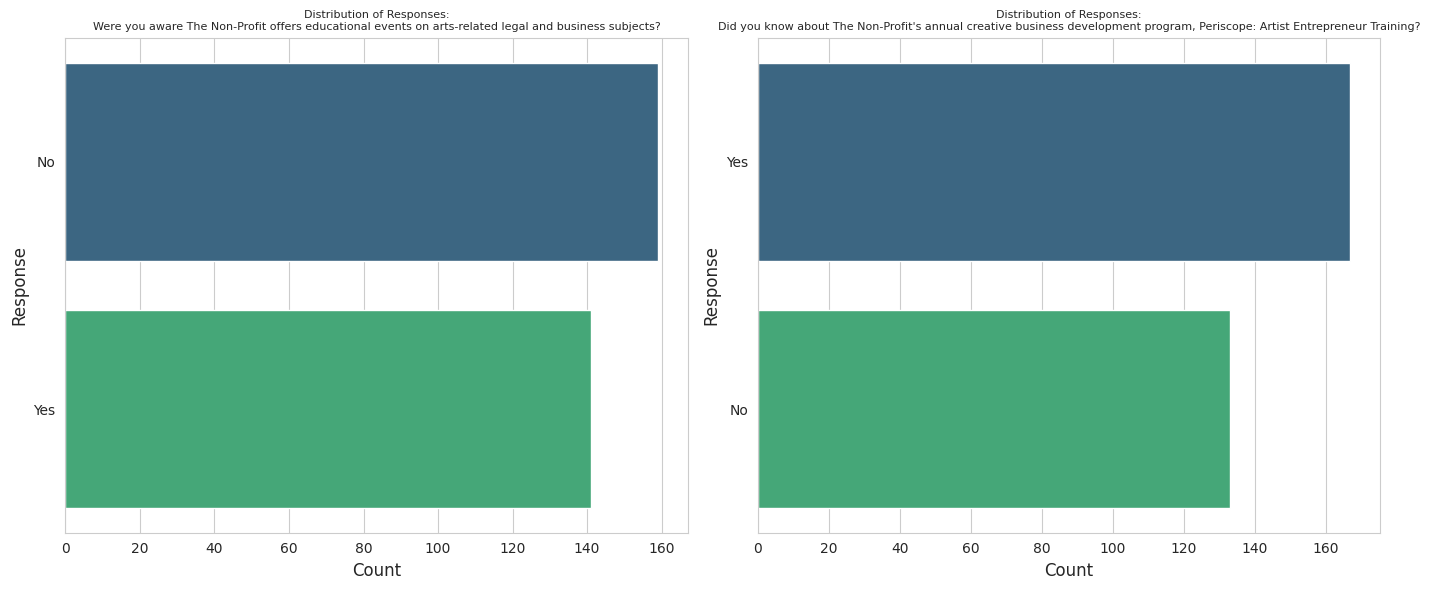

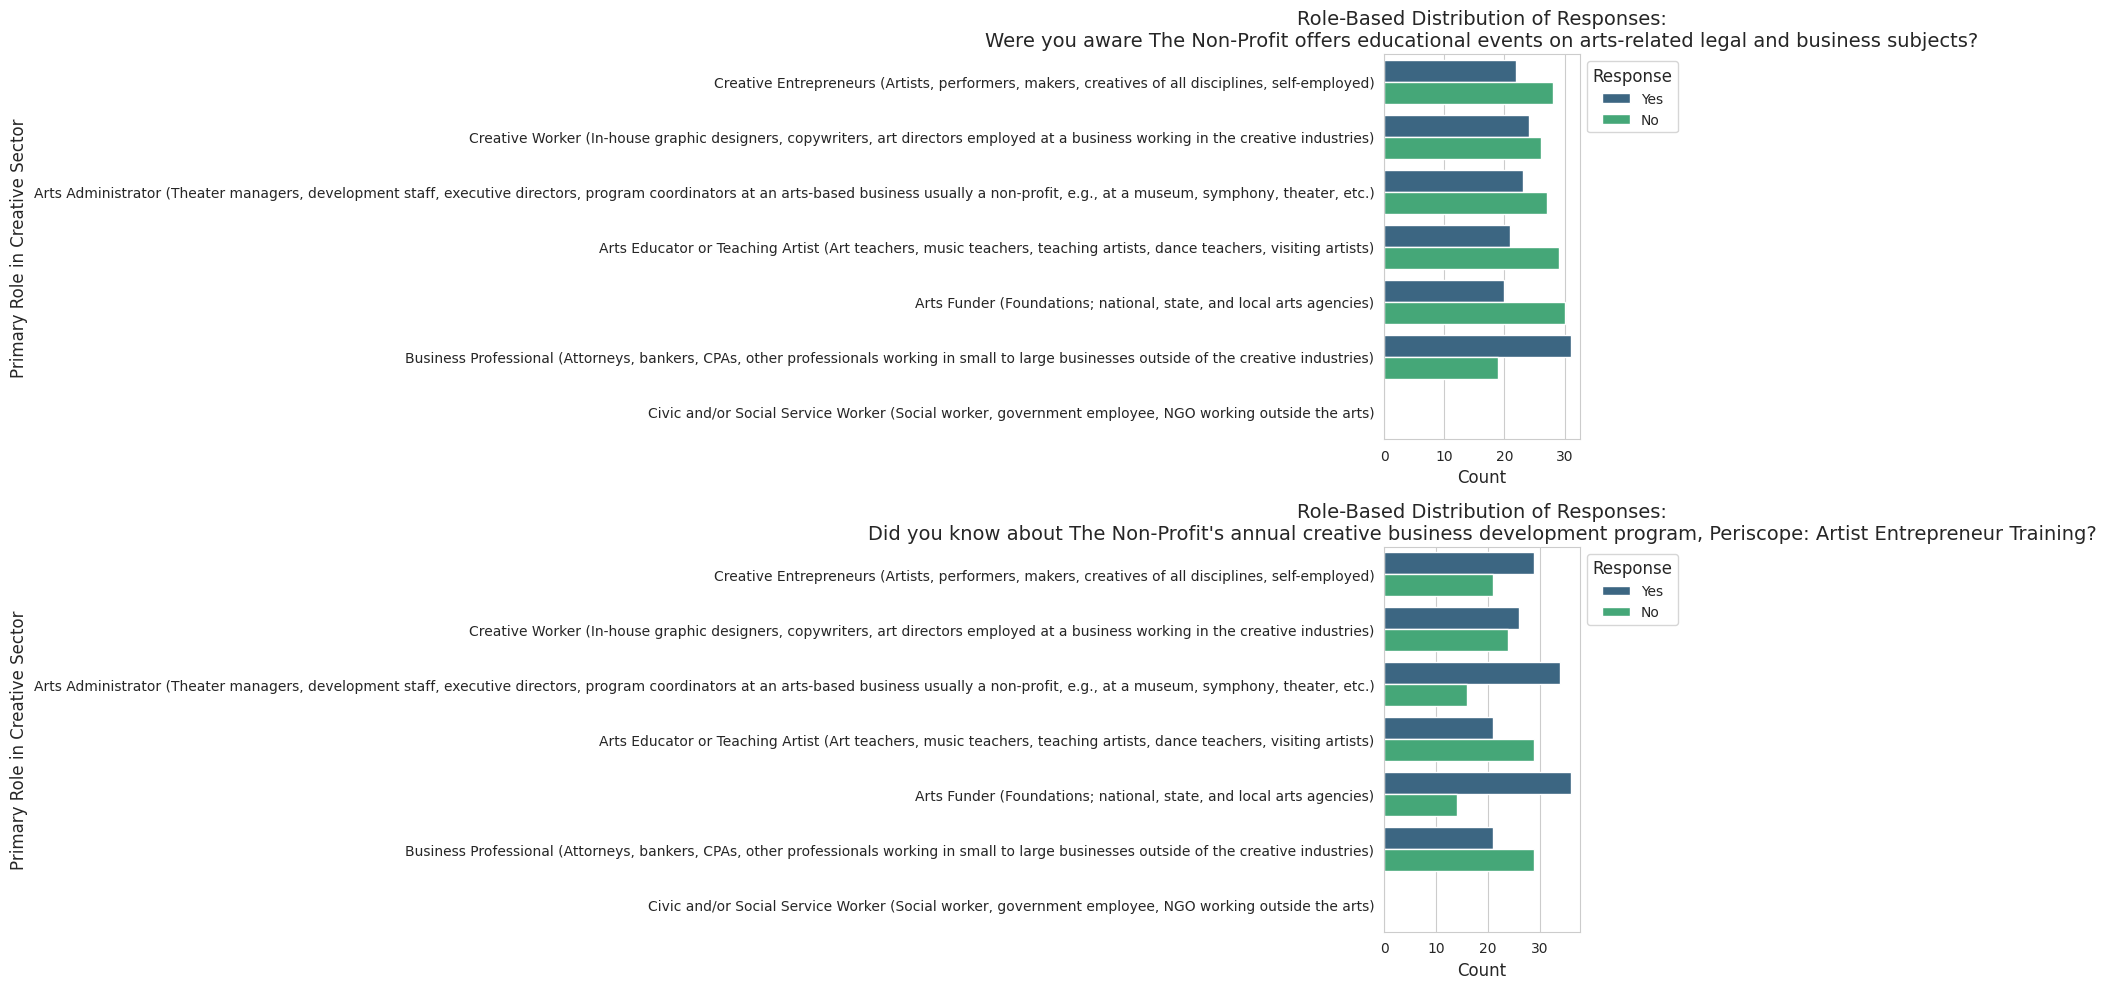

In [6]:
# Questions related to awareness about events or programs
awareness_questions = [
    "Were you aware The Non-Profit offers educational events on arts-related legal and business subjects?",
    "Did you know about The Non-Profit's annual creative business development program, Periscope: Artist Entrepreneur Training?"
]

# Setting up the plotting style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Iterating through selected questions
for idx, question in enumerate(awareness_questions, 1):
    plt.subplot(1, 2, idx)
    
    # Counting the responses and plotting
    sns.countplot(data=data, y=question, order=data[question].value_counts().index, palette="viridis")
    
    plt.title(f"Distribution of Responses:\n{question}", fontsize=8)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Response", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

# Extracting relevant data for role-based analysis
role_awareness_data = data[["Describe Your Primary Role in Creative Sector"] + awareness_questions]

# Setting up the plotting style and figure size
plt.figure(figsize=(16, 10))

# Iterating through selected questions
for idx, question in enumerate(awareness_questions, 1):
    plt.subplot(2, 1, idx)
    
    # Counting the responses and plotting
    sns.countplot(data=role_awareness_data, y="Describe Your Primary Role in Creative Sector", hue=question, palette="viridis", 
                  order=role_awareness_data["Describe Your Primary Role in Creative Sector"].value_counts().index)
    
    plt.title(f"Role-Based Distribution of Responses:\n{question}", fontsize=14)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Primary Role in Creative Sector", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title="Response", title_fontsize=12, fontsize=10, bbox_to_anchor=(1, 1))

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

In the provided code snippet, I've conducted an analysis to understand the distribution of respondents' awareness about certain events and programs mentioned in the survey. The analysis is split into two parts: general awareness and role-based awareness.

1. General Awareness Distribution:
Question Selection: I've chosen two specific questions from the survey related to awareness about events or programs offered by the non-profit organization.
Visualization: I utilized count plots to illustrate the distribution of responses ("Yes" or "No") to these two questions.
Potential Insights: These plots could provide a clear visual representation of the general level of awareness about these programs among all respondents.
2. Role-Based Awareness Distribution:
Data Extraction: I extracted the relevant data for role-based analysis, focusing on the two chosen questions and the respondents' roles in the creative sector.
Visualization: I used count plots again but, this time, segregated by the respondents' roles and colored by their responses to the questions.
Potential Insights: This visualization might unveil interesting patterns or discrepancies in awareness levels about the events across different roles within the creative sector.

Q6. Show the distribution of words which come to mind for respondents when they think of the non-profit organization. You can do this using a package to assist in creating word clouds or also you can create a general bar plot.

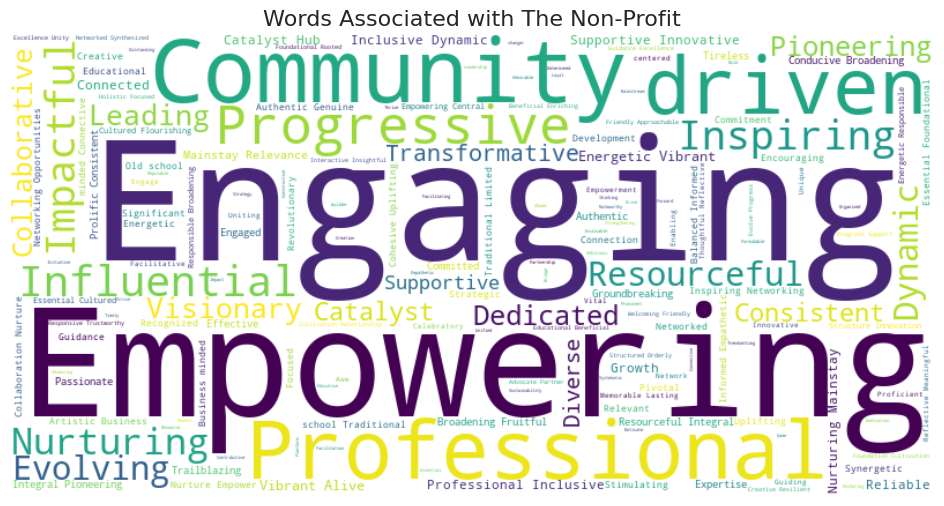

[('empowering,', 20), ('energetic,', 15), ('professional,', 15), ('engaging,', 14), ('consistent,', 13), ('inspiring,', 12), ('supportive,', 11), ('resourceful,', 11), ('dynamic,', 11), ('catalyst,', 10)]


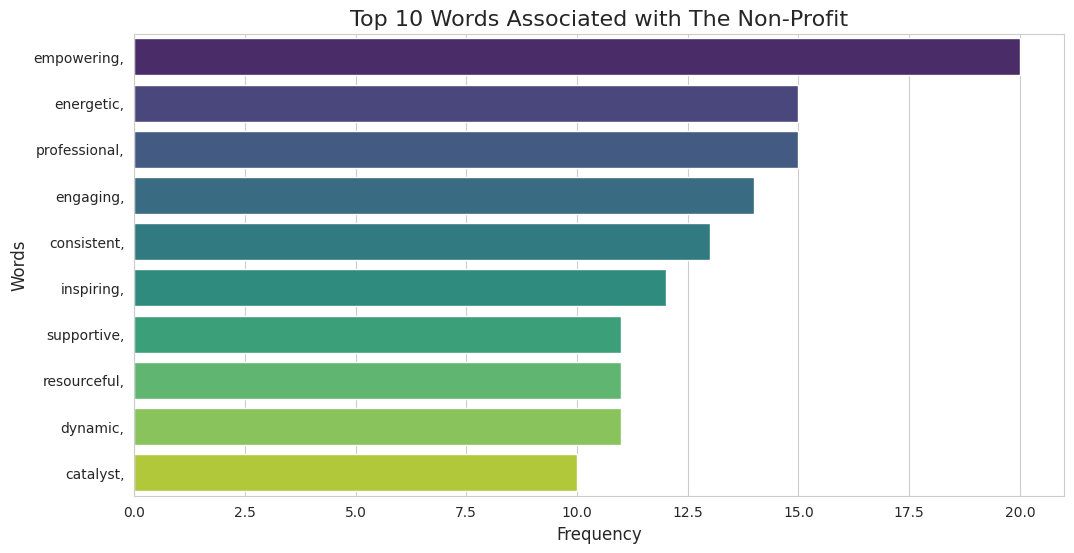

In [7]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# Extracting the column with words associated with The Non-Profit
words_column = "What three words come to mind when you think of the Arts & Business Council of Greater Nashville?"

# Dropping NaN values and concatenating words from all responses
words = data[words_column].dropna().str.cat(sep=' ')

# Generating a word cloud
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Words Associated with The Non-Profit", fontsize=16)
plt.show()

# Returning the most common words for further analysis
word_counter = Counter(words.lower().split())
common_words = word_counter.most_common(10)
print(common_words)

# Extracting words and frequencies for plotting
words, frequencies = zip(*common_words)

# Creating a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=list(words), palette="viridis")
plt.title("Top 10 Words Associated with The Non-Profit", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Words", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In the provided code snippet, I've performed an analysis to visualize the distribution of words that respondents associate with the non-profit organization. The analysis and visualization are primarily done in two main parts: via a word cloud and a bar plot.

1. Word Cloud Visualization:
Data Preparation: I extracted and concatenated words from all responses regarding what comes to mind when thinking of the non-profit organization.
Visualization: A word cloud was generated and displayed, offering a visual representation of the most frequently occurring words in the responses.
Potential Insights: The word cloud provides an immediate visual sense of the predominant words or concepts associated with the non-profit organization.
2. Bar Plot of the Most Common Words:
Data Analysis: I utilized a counter to identify and display the ten most common words mentioned by respondents.
Visualization: A bar plot was generated to visualize these common words along with their respective frequencies.
Potential Insights: The bar plot precisely quantifies the occurrences of the top words, providing clear data on which words or concepts are most often associated with the non-profit.
Consi